## Observations and Insights 

In [85]:
%matplotlib notebook

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [87]:
# Checking the number of mice.
df["Mouse ID"].count()

1893

In [88]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df[df.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [89]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
df = df.drop_duplicates(subset=['Mouse ID','Timepoint'])
df["Mouse ID"].count()

1888

In [90]:
# Checking the number of mice in the clean DataFrame.
print(len(df["Mouse ID"].value_counts()))

249


## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sum_stats = df.groupby(["Drug Regimen"])

mean_vol = sum_stats["Tumor Volume (mm3)"].mean()
median_vol = sum_stats["Tumor Volume (mm3)"].median()
var_vol = sum_stats["Tumor Volume (mm3)"].var()
std_vol = sum_stats["Tumor Volume (mm3)"].std()
sem_vol = sum_stats["Tumor Volume (mm3)"].sem()

sum_stats_df = pd.DataFrame({"Mean Volume": mean_vol,
                            "Median Volume": median_vol,
                            "Variance of Volume": var_vol,
                            "Standard Deviation of Volume": std_vol,
                            "SEM of Volume": sem_vol})

sum_stats_df


,Mean Volume,Median Volume,Variance of Volume,Standard Deviation of Volume,SEM of Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_df = df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var","std", "sem"])

agg_stats_df.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [78]:
measurements = df.groupby(["Drug Regimen"])[["Timepoint"]].count()
measurements = measurements.sort_values(["Timepoint"], ascending=False)
measurements.columns =["Measurement Counts"]
measurements

,Measurement Counts
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


<IPython.core.display.Javascript object>


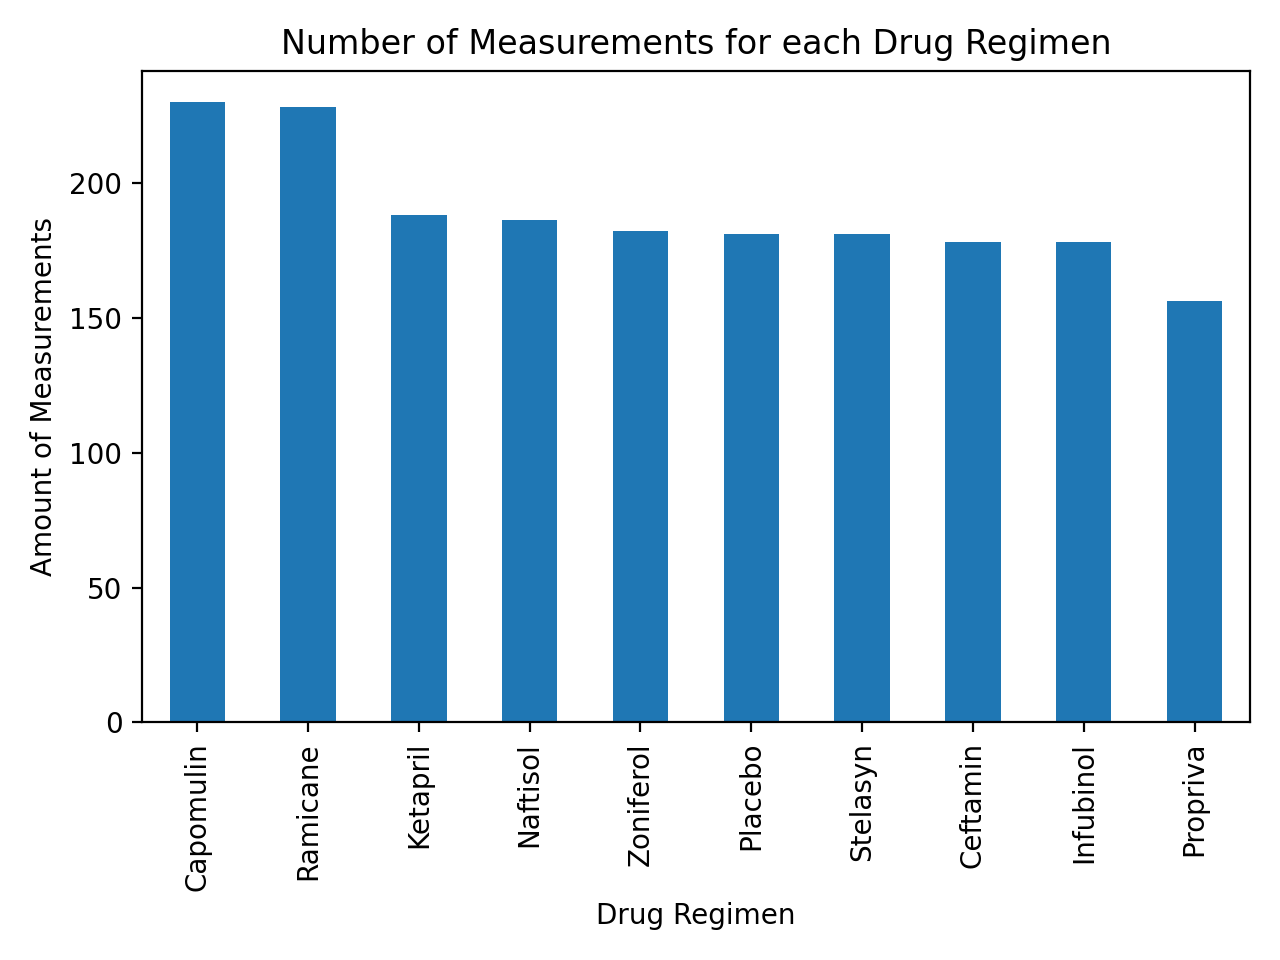

In [79]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements.plot(kind="bar", title="Number of Measurements for each Drug Regimen",ylabel="Amount of Measurements",legend=False)
plt.tight_layout()


<IPython.core.display.Javascript object>


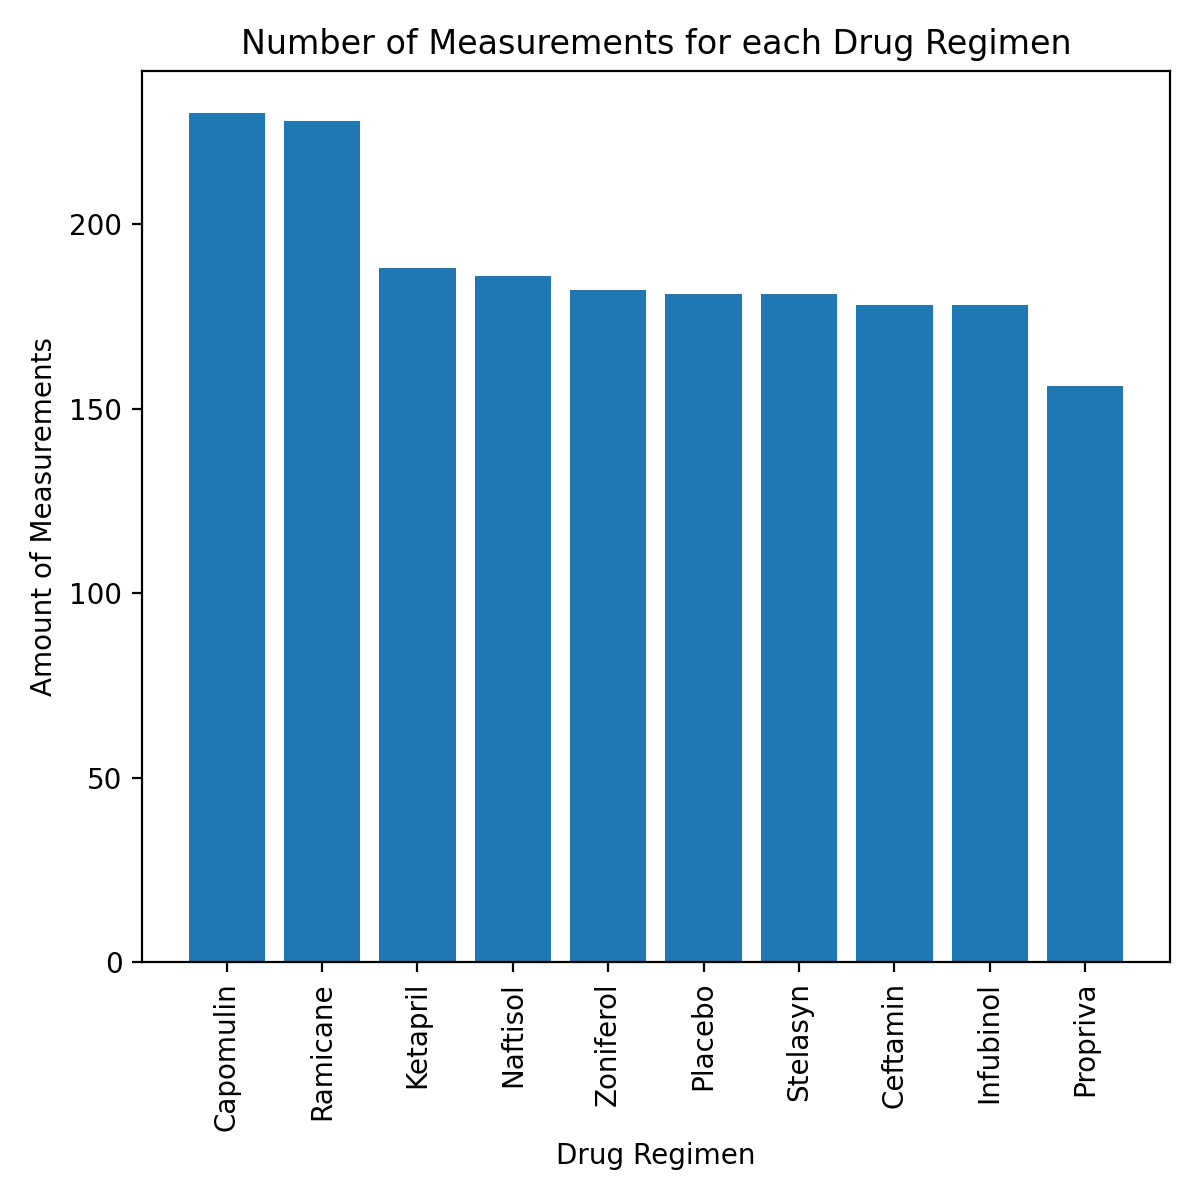

In [91]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
dcounts = measurements["Measurement Counts"]
x_axis = np.arange(len(dcounts))

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x_axis, dcounts);
ax.set_xticks(x_axis);
ax.set_xticklabels(dcounts.index.values, rotation="vertical")
ax.set(title="Number of Measurements for each Drug Regimen",
      xlabel="Drug Regimen",
      ylabel="Amount of Measurements");
fig.tight_layout();


In [93]:
by_gender = df.groupby(["Mouse ID","Sex"])

mouse_gender = pd.DataFrame(by_gender["Mouse ID"].count())

genders = pd.DataFrame(mouse_gender.groupby(["Sex"]).count())
genders.columns = ["Counts"]

genders

,Counts
Sex,
Female,124
Male,125


<IPython.core.display.Javascript object>


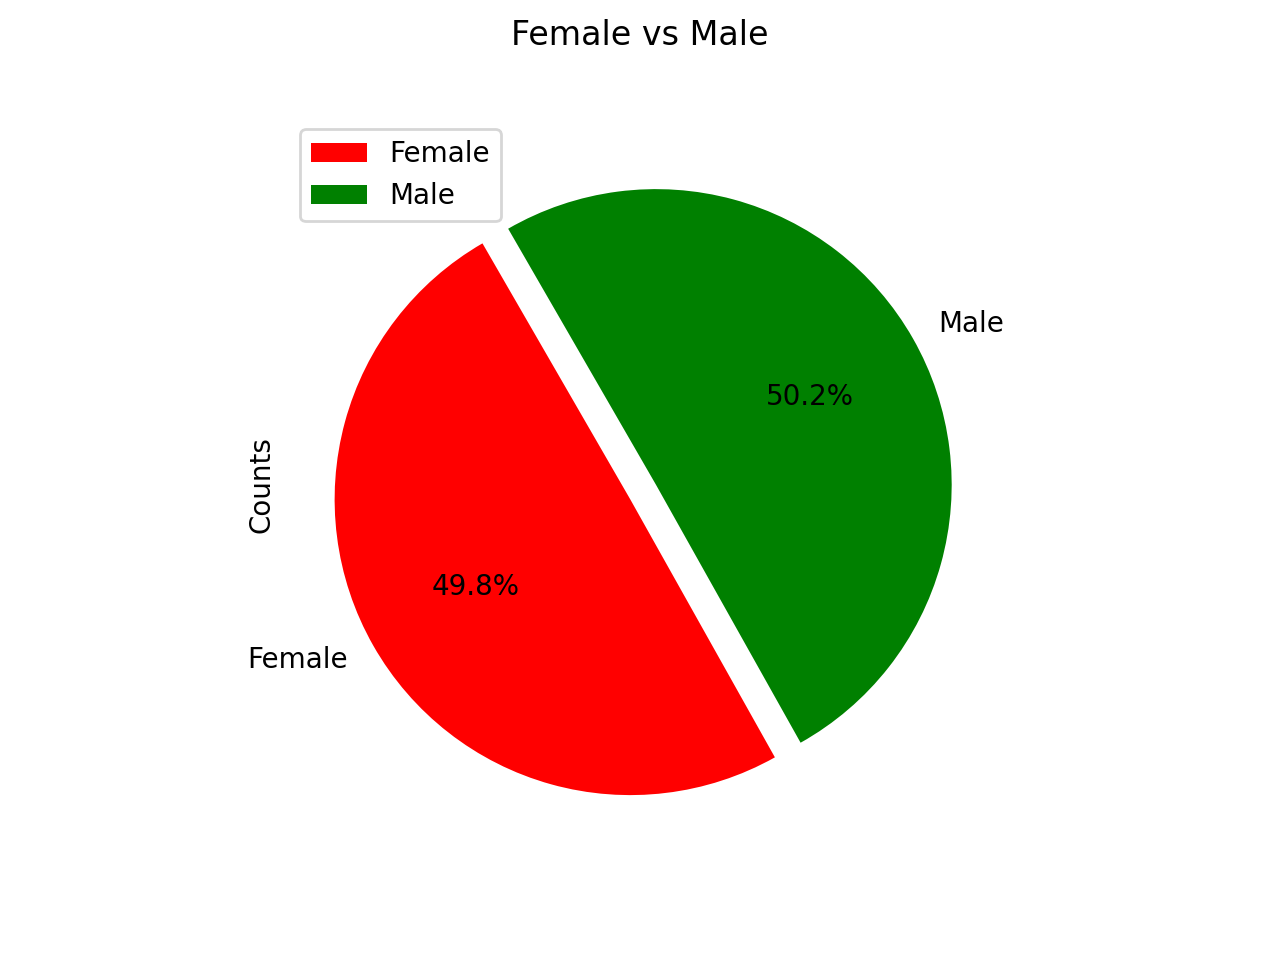

array([<AxesSubplot:ylabel='Counts'>], dtype=object)

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders.plot(kind="pie", subplots=True, autopct="%1.1f%%", title="Female vs Male", explode=(0.1,0), colors=['red','green'], startangle=120)

<IPython.core.display.Javascript object>


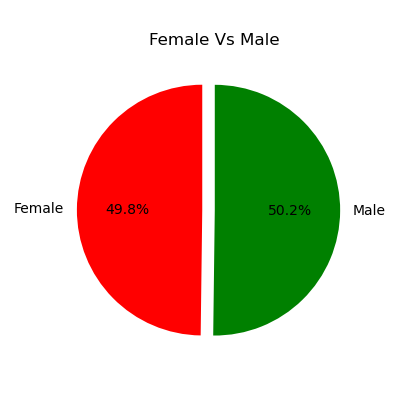

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = genders.index.values.tolist()
scounts = genders["Counts"]

fig2, ax2 = plt.subplots(figsize=(4,4))
ax2.pie(scounts, labels=sex, autopct="%1.1f%%", explode=(0.1,0), colors=['red','green'], startangle=90);
ax2.set(title="Female Vs Male")
fig2.tight_layout()

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

quartiles_df = df.loc[(df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]))]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = quartiles_df[quartiles_df["Timepoint"]==quartiles_df["Timepoint"].max()].reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_df = pd.merge(df, last_timepoint, on="Mouse ID", how="right")

last_tumor_df

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,index,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,9,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,9,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,9,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,9,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,9,Ramicane,Male,21,16,45,22.050126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,z581,Infubinol,Female,24,25,25,54.316407,2,1872,Infubinol,Female,24,25,45,62.754451,3
626,z581,Infubinol,Female,24,25,30,56.286750,2,1872,Infubinol,Female,24,25,45,62.754451,3
627,z581,Infubinol,Female,24,25,35,58.628399,3,1872,Infubinol,Female,24,25,45,62.754451,3
628,z581,Infubinol,Female,24,25,40,60.053740,3,1872,Infubinol,Female,24,25,45,62.754451,3


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data_df = last_tumor_df.loc[last_tumor_df["Drug Regimen_x"] == treatment]
    
    # add subset 
    vol_df = data_df.loc[data_df["Timepoint_x"] == data_df["Timepoint_y"]]
    
    values = vol_df["Tumor Volume (mm3)_x"]
    
    tumor_data.append(values)
    
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25, .5, .75])
    iqr = quartiles[.75] - quartiles[.25]
    
    print(f'The IQR of {treatment} = {iqr}')

    # Use IQR to find upper and lower bounds
    lower_bound = quartiles[.25] - (1.5*iqr)
    upper_bound = quartiles[.75] + (1.5*iqr)
    
    print(f'The lower quartile for {treatment} = {quartiles[.25]}')
    print(f'The median for {treatment} = {quartiles[.5]}')
    print(f'The upper quartile for {treatment} = {quartiles[.75]}')
    print(f'Lower Bound for {treatment} = {lower_bound}')
    print(f'Upper Bound for {treatment} = {upper_bound}')
    
    # Determine outliers
    outliers = (values.loc[(vol_df['Tumor Volume (mm3)_x'] >= upper_bound) |
                           (vol_df['Tumor Volume (mm3)_x'] <= lower_bound)]).count()
    
    print(f'{treatment} has {outliers} outlier(s)')



The IQR of Capomulin = 7.781863460000004
The lower quartile for Capomulin = 32.37735684
The median for Capomulin = 37.31184577
The upper quartile for Capomulin = 40.1592203
Lower Bound for Capomulin = 20.70456164999999
Upper Bound for Capomulin = 51.83201549
Capomulin has 0 outlier(s)
The IQR of Ramicane = 7.527130082499998
The lower quartile for Ramicane = 30.981175224999998
The median for Ramicane = 34.848627300000004
The upper quartile for Ramicane = 38.508305307499995
Lower Bound for Ramicane = 19.690480101250003
Upper Bound for Ramicane = 49.79900043124999
Ramicane has 0 outlier(s)
The IQR of Infubinol = 4.9311172099999965
The lower quartile for Infubinol = 62.75445141
The median for Infubinol = 66.08306589
The upper quartile for Infubinol = 67.68556862
Lower Bound for Infubinol = 55.35777559500001
Upper Bound for Infubinol = 75.08224443499999
Infubinol has 0 outlier(s)
The IQR of Ceftamin = 6.093590140000003
The lower quartile for Ceftamin = 61.43389223
The median for Ceftamin = 

<IPython.core.display.Javascript object>


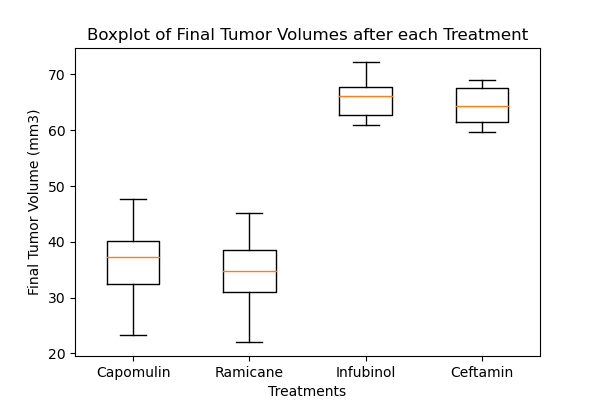

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig,ax = plt.subplots(figsize=(6,4));
ax.boxplot(tumor_data, labels=treatments);
ax.set(title="Boxplot of Final Tumor Volumes after each Treatment",
      xlabel="Treatments",
      ylabel="Final Tumor Volume (mm3)");


## Line and Scatter Plots

<IPython.core.display.Javascript object>


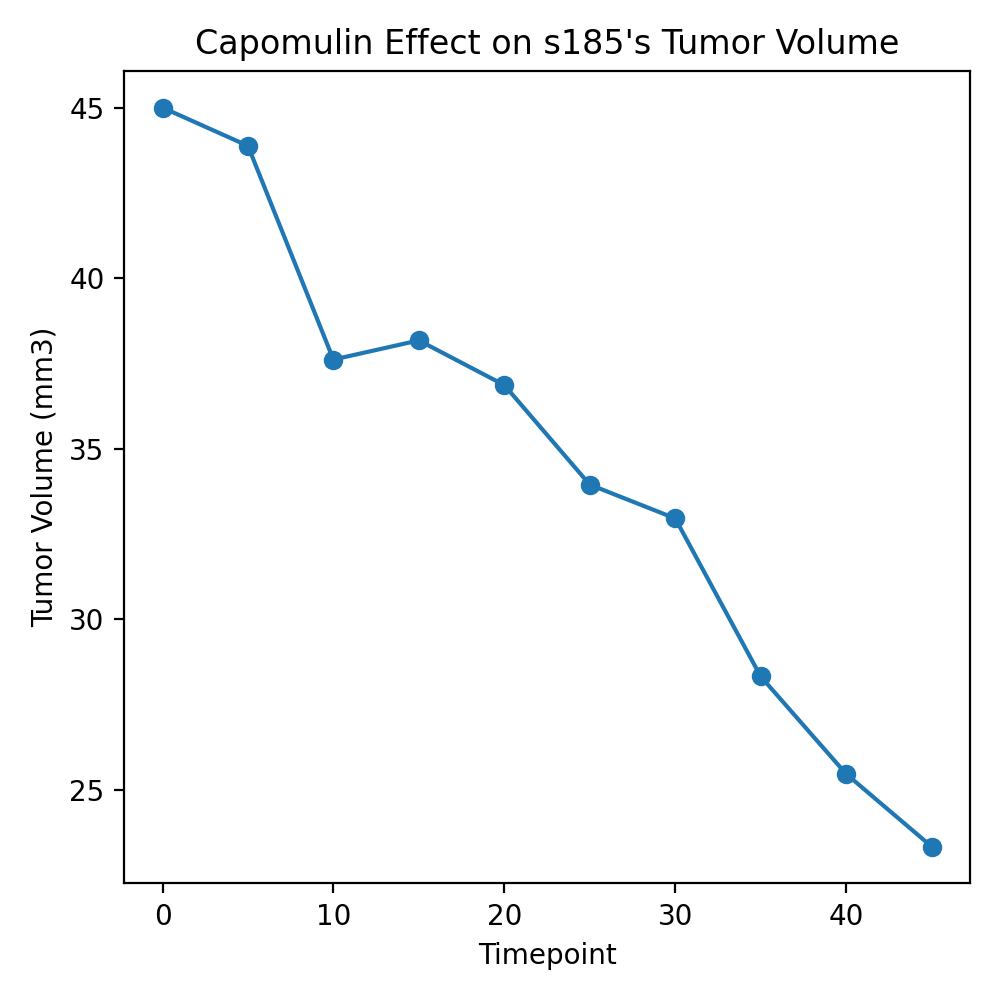

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = df.loc[(df["Drug Regimen"] == "Capomulin"),:]
s185_df = capo_df.loc[(capo_df["Mouse ID"] == "s185"),:]

volume = s185_df["Tumor Volume (mm3)"]
timepoint = s185_df["Timepoint"]

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(timepoint, volume, marker="o");
ax.set(title="Capomulin Effect on s185's Tumor Volume",
      xlabel="Timepoint",
      ylabel="Tumor Volume (mm3)")
fig.tight_layout();

<IPython.core.display.Javascript object>


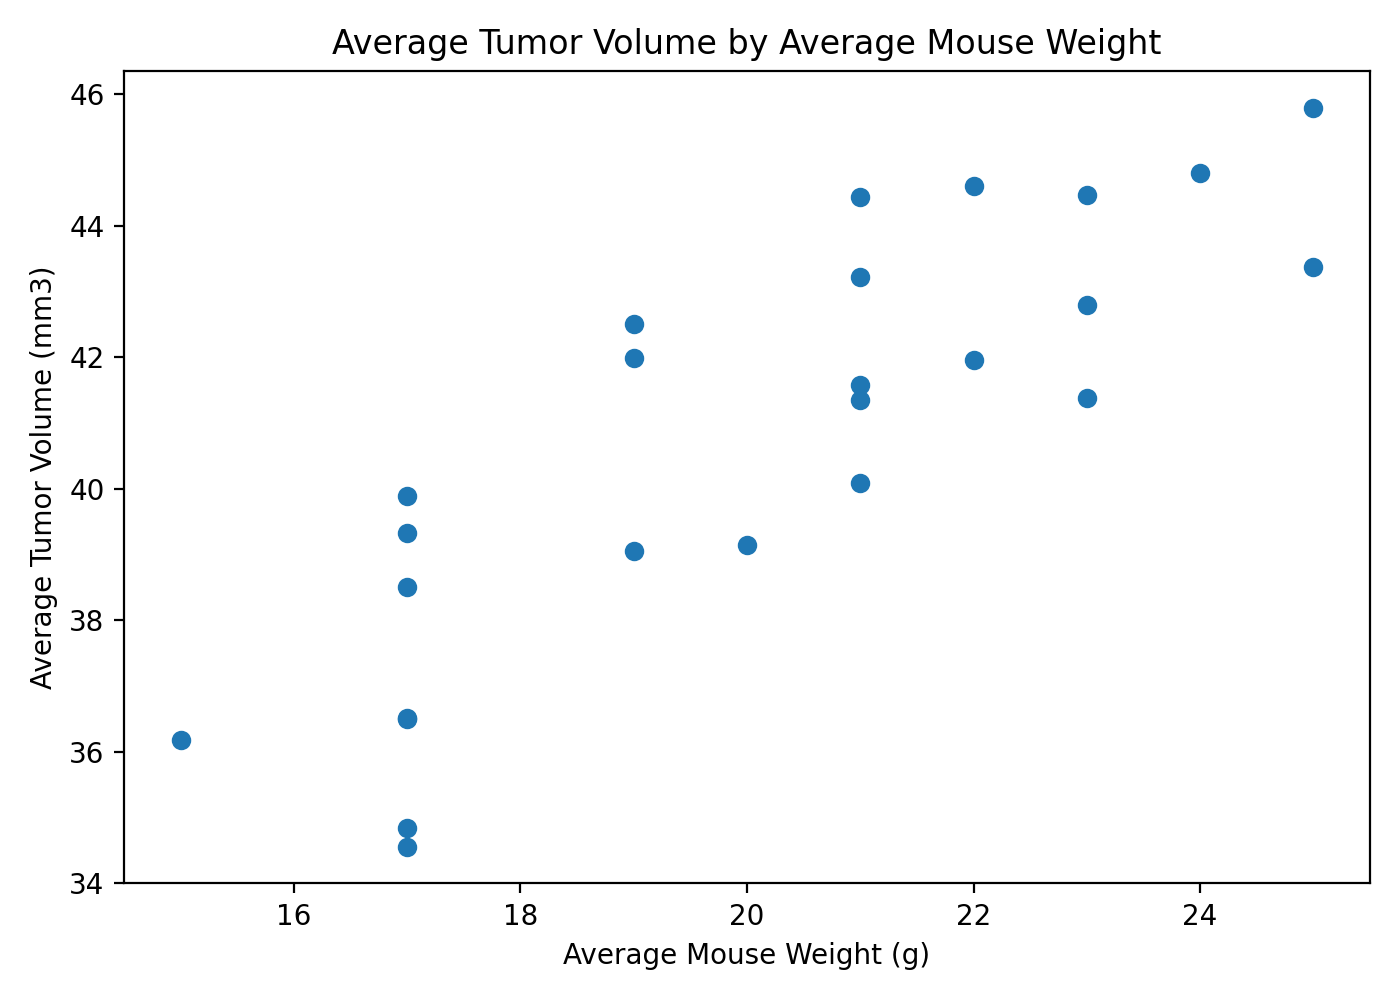

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol = capo_df.groupby(["Mouse ID"])[["Tumor Volume (mm3)"]].mean()
avg_weight = capo_df.groupby(["Mouse ID"])[["Weight (g)"]].mean()

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(avg_weight, avg_vol);
ax.set(title="Average Tumor Volume by Average Mouse Weight",
      xlabel="Average Mouse Weight (g)",
      ylabel="Average Tumor Volume (mm3)")
fig.tight_layout();

## Correlation and Regression

The correlation coefficient for weight and tumor volume is 0.84


<IPython.core.display.Javascript object>


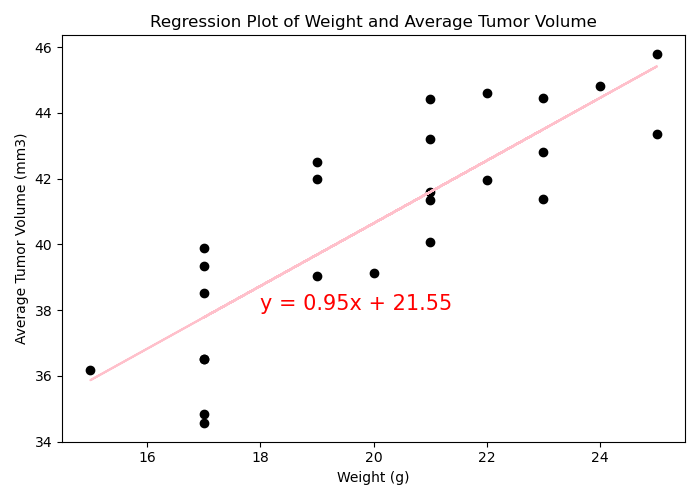

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = avg_weight["Weight (g)"]
y = avg_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept

correlation = round(st.pearsonr(x,y)[0],2)
print(f'The correlation coefficient for weight and tumor volume is {correlation}')

# Plot the linear regression model
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(7,5));
ax.scatter(x,y, color="black");
ax.plot(x, regress_values, color="pink");
ax.annotate(line_eq,(18,38),fontsize=15,color="red")
ax.set(title="Regression Plot of Weight and Average Tumor Volume",
      xlabel="Weight (g)",
      ylabel= "Average Tumor Volume (mm3)");
fig.tight_layout();